In [34]:

import requests
import os
import json
import keys.keys as keys
# To set your enviornment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'


def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers


def get_rules(headers, bearer_token):
    response = requests.get(
        "https://api.twitter.com/2/tweets/search/stream/rules", headers=headers
    )
    if response.status_code != 200:
        raise Exception(
            "Cannot get rules (HTTP {}): {}".format(response.status_code, response.text)
        )
    print(json.dumps(response.json()))
    return response.json()


def delete_all_rules(headers, bearer_token, rules):
    if rules is None or "data" not in rules:
        return None

    ids = list(map(lambda rule: rule["id"], rules["data"]))
    payload = {"delete": {"ids": ids}}
    response = requests.post(
        "https://api.twitter.com/2/tweets/search/stream/rules",
        headers=headers,
        json=payload
    )
    if response.status_code != 200:
        raise Exception(
            "Cannot delete rules (HTTP {}): {}".format(
                response.status_code, response.text
            )
        )
    print(json.dumps(response.json()))


def set_rules(headers, delete, bearer_token):
    # You can adjust the rules if needed
    sample_rules = [
        {"value": "entity:Microsoft OR Azure OR entity:Excel OR powerpoint OR entity:Teams OR entity:Surface lang:en -is:retweet", "tag": "Microsoft"},
        {"value": "entity:Apple OR entity:iPad OR entity:iPhone OR entity:Mac OR airpod OR macbook lang:en -is:retweet", "tag": "Apple"}
    ]
    payload = {"add": sample_rules}
    response = requests.post(
        "https://api.twitter.com/2/tweets/search/stream/rules",
        headers=headers,
        json=payload,
    )
    if response.status_code != 201:
        raise Exception(
            "Cannot add rules (HTTP {}): {}".format(response.status_code, response.text)
        )
    print(json.dumps(response.json()))


def get_stream(headers, set, bearer_token):
    response = requests.get(
        "https://api.twitter.com/2/tweets/search/stream?tweet.fields=created_at&expansions=author_id&user.fields=created_at", headers=headers, stream=True,
    )
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(
            "Cannot get stream (HTTP {}): {}".format(
                response.status_code, response.text
            )
        )
    for response_line in response.iter_lines():
        if response_line:
            data = json.loads(response_line)['data']
            tag = json.loads(response_line)['matching_rules']
            print(data.keys(), tag)
            tweet = data['text']
            time_ms = datetime.strptime(data['created_at'], "%Y-%m-%dT%H:%M:%S.%fZ").timestamp()
            id_str = data['id']
            user_str = data['author_id']
            print(tweet, time_ms, id_str, user_str, tag[0]['tag'])
            print(type(time_ms))
            break



def main():
    bearer_token = keys.BEARER_TOKEN #os.environ.get("BEARER_TOKEN")
    headers = create_headers(bearer_token)
    rules = get_rules(headers, bearer_token)
    delete = delete_all_rules(headers, bearer_token, rules)
    new_rules = set_rules(headers, delete, bearer_token)
    get_stream(headers, new_rules, bearer_token)

In [35]:
a = main()

{"data": [{"id": "1350189503999307781", "value": "entity:Microsoft OR Azure OR entity:Excel OR powerpoint OR entity:Teams OR entity:Surface lang:en -is:retweet", "tag": "Microsoft"}, {"id": "1350189503999307780", "value": "entity:Apple OR entity:iPad OR entity:iPhone OR entity:Mac OR airpod OR macbook lang:en -is:retweet", "tag": "Apple"}], "meta": {"sent": "2021-01-15T21:14:28.219Z"}}
{"meta": {"sent": "2021-01-15T21:14:29.597Z", "summary": {"deleted": 2, "not_deleted": 0}}}
{"data": [{"value": "entity:Microsoft OR Azure OR entity:Excel OR powerpoint OR entity:Teams OR entity:Surface lang:en -is:retweet", "tag": "Microsoft", "id": "1350189638284169219"}, {"value": "entity:Apple OR entity:iPad OR entity:iPhone OR entity:Mac OR airpod OR macbook lang:en -is:retweet", "tag": "Apple", "id": "1350189638284169220"}], "meta": {"sent": "2021-01-15T21:14:31.155Z", "summary": {"created": 2, "not_created": 0, "valid": 2, "invalid": 0}}}
200
dict_keys(['id', 'text', 'created_at', 'author_id']) [{

In [36]:
type(a)

NoneType

In [89]:
datetime.strptime('2021-01-15T21:14:21.000 UTC', "%Y-%m-%dT%H:%M:%S.%f %Z")

datetime.datetime(2021, 1, 15, 21, 14, 21)

In [93]:
datetime.strptime('2021-01-15T21:14:21.000Z', "%Y-%m-%dT%H:%M:%S.%fZ").timestamp()

1610763261.0

In [2]:
from datetime import datetime

In [3]:
import time
time.tzname

('EST', 'EDT')

In [1]:
import pandas as pd

In [109]:
datetime.now()

AttributeError: module 'datetime' has no attribute 'now'

In [113]:
t = datetime.timestamp(datetime.now())
t

1610751756.89121

In [114]:
pd.to_datetime(datetime.fromtimestamp(1610763261.0))

Timestamp('2021-01-15 21:14:21')

In [94]:
pd.to_datetime(1610763261.0, unit='s')

Timestamp('2021-01-16 02:14:21')

In [15]:
import sqlite3

import re
import spacy
nlp = spacy.load('en_core_web_lg')
import ktrain
import datetime

# Load BERT model
MODEL_PATH = 'models/BERT_2'
predictor = ktrain.load_predictor(MODEL_PATH)

W0118 22:15:37.185989 4797619712 core.py:204] In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
W0118 22:15:37.187672 4797619712 core.py:204] In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
W0118 22:15:37.188516 4797619712 core.py:204] In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
W0118 22:15:37.189178 4797619712 core.py:204] In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data

In [1]:
import sqlite3
import datetime
# Timestamp for today's date
TIMESTAMP = str(datetime.date.today()).replace('-','')
TIMESTAMP

'20210217'

In [3]:
# streamer = twitter_stream.streamTwitter([], TIMESTAMP)

### SQL Connection ###
conn = sqlite3.connect(f'data/twitter_{TIMESTAMP}_v2.db', check_same_thread=False, timeout=25)
c = conn.cursor()

In [5]:
c.execute("SELECT * FROM sentiment").fetchall()

[(1613597432000.0,
  '1362076978728345615',
  '3882884975',
  'United Way of the Mohawk Valley has Take and Make meal boxes that will be given away through three distribution days. City of Utica residents in need can sign-up now to reserve their meal box, containing 5 meals for a family of 5 by visiting: https://t.co/oDGJXFyYz7',
  'United',
  0.4215),
 (1613597438000.0,
  '1362077003080491017',
  '1145359310920306689',
  '@AniUTD @midwingba @NotoriousManc How is what you’ve just said not the same thing as saying “those who are Ole in are not United fans”?',
  'United',
  -0.3252),
 (1613597439000.0,
  '1362077009107685377',
  '101248683',
  "Football twitter is the worst. If Henry had played for United, he'd have been better than Maradona and on par with Ronaldo. People on here are so biased and agenda driven. https://t.co/HVlZZ6MT2P",
  'United',
  0.0667),
 (1613597443000.0,
  '1362077022718218240',
  '419112498',
  '@notseanv3 I watch nearly every United game dfkm',
  'United',
  0

In [55]:
# SQL Database
def create_table(cursor, conn):
    cursor.execute("CREATE TABLE IF NOT EXISTS flagged(id TEXT, tweet TEXT, vader REAL, bert REAL, mood TEXT, sentiment REAL)")
    conn.commit()

def create_clean_table(cursor, conn):
    cursor.execute("CREATE TABLE IF NOT EXISTS clean(unix REAL, id TEXT, clean TEXT)")
    conn.commit()
create_clean_table(c, conn)

In [40]:
c.execute("DROP TABLE flagged")
conn.commit()

In [130]:
### spaCy tokenizer ###
def clean_text(text, stopwords=False, tweet=True):
    """
    Cleans and tokenizes tweet text data.
    Args:
        text (str): tweet text data
        
        stopwords (bool): True if stopwords needs to be removed
        
        tweet (bool): True if text data are tweets.
    
    Returns:
        tokens (array): Array of tokenized words from given text.
    """

    if tweet:
        text = re.sub(r'@\S+', '', text) # Gets rid of any mentions
#         text = re.sub(r'RT\S+', '', text) # Gets rid of any retweets
        text = re.sub(r'#', '', text) # Gets rid of hashtag sign
        text = re.sub(r'https?:\/\/\S+', '', text) # Gets rid of any links
#         text = re.sub(r'[0-9]+.?[0-9]+', '', text) # Gets rid of X.X where X are numbers
        text = re.sub(r'(&quot;|&Quot;)', '', text) # Gets rid of quotes    
        text = re.sub(r'(&amp;|&Amp;)', '', text) # Gets rid of quotes
        text = re.sub(r'link', '', text) # Gets rid of quotes
    doc = nlp(text)

    tokens = []
    for token in doc:
        if token.lemma_ != '-PRON-': # if token is not a pronoun
            temp_token = token.lemma_.lower().strip()
        else:
            temp_token = token.lower_
        tokens.append(temp_token)
    
    if stopwords:
        # tokens_stopped = [token for token in tokens if token not in stopwords_list and len(token)>2]
        pass
    else:
        tokens_stopped = [token for token in tokens if len(token)>2]
    c.update(tokens_stopped)
    return ' '.join(tokens_stopped)


In [131]:
clean_text('cat cats dog dogs fish fishes')

'cat cat dog dog fish fish'

In [132]:
c

Counter({'a': 1, 'b': 1, 'cat': 2, 'dog': 2, 'fish': 2})

In [25]:
clean_time = datetime.datetime.timestamp(datetime.datetime.now())*1000
analyze_time = clean_time

In [29]:
while 1:
    clean_df = pd.read_sql(f"""SELECT * FROM sentiment 
                      WHERE unix > {clean_time} AND sentiment NOT BETWEEN -0.3 AND 0.3
                      ORDER BY unix ASC""", conn)
    print(f'There are {len(clean_df)} new tweets to clean!')
    new_clean_df = pd.DataFrame(columns=['unix', 'id', 'clean'])
    new_clean_df['unix'] = temp_df['unix']
    new_clean_df['id'] = temp_df['id']
    new_clean_df['clean'] = temp_df['tweet'].apply(clean_text)
    
    new_clean_df.to_sql('clean', conn, if_exists='append', index=False)
    
    clean_time = clean_df.iloc[-1]['unix']
    
    temp_df = pd.read_sql(f"""SELECT s.unix, s.id, s.sentiment, c.clean FROM sentiment s
                              JOIN clean c
                              ON s.id = c.id
                              WHERE s.unix > {analyze_time} AND sentiment NOT BETWEEN -0.69 and 0.79
                              ORDER BY s.unix ASC""", conn)
    if len(temp_df) > 0:
        print(f'There are {len(temp_df)} new tweets to analyze!')
        analyze_time = temp_df.iloc[-1]['unix']
        
        new_df = pd.DataFrame(columns=['unix', 'id', 'clean', 'VADER', 'BERT', 'mood', 'sentiment'])
        
        new_df['clean'] = temp_df['clean']
        new_df['unix'] = temp_df['unix']
        new_df['id'] = temp_df['id']
        new_df['VADER'] = temp_df['sentiment']

        proba = predictor.predict_proba(list(new_df['clean']))

        bert = []
        mood = []
        senti = []
        for i, prob in enumerate(proba):
            if prob[0] > prob[1]:
                bert.append(prob[0])
                if new_df['VADER'][i] < 0:
                    senti.append(new_df['VADER'][i]*prob[0])
                    mood.append('Negative')
                else:
                    senti.append(0)
                    mood.append('?')
            else:
                bert.append(prob[1])
                if new_df['VADER'][i] > 0:
                    senti.append(new_df['VADER'][i]*prob[1])
                    mood.append('Positive')
                else:
                    senti.append(0)
                    mood.append('?')

        new_df['BERT'] = bert
        new_df['mood'] = mood
        new_df['sentiment'] = senti
        
        new_df.to_sql('flagged', conn, if_exists='append', index=False)

    else:
        print('No new tweets.')
    
    

There are 20 new tweets!


There are 2 new tweets!


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ktrain/text/preprocessor.py:209: UserWarning: List or array of two texts supplied, so task being treated as text classification. If this is a sentence pair classification task, please cast to tuple.
  'If this is a sentence pair classification task, please cast to tuple.')


KeyboardInterrupt: 

In [18]:
temp_df.to_sql('flagged', conn, if)

,unix,id,clean,VADER,BERT,sentiment,score
0,1.611026e+12,1351367952126382084,we’re apple pod now make sure like share rate ...,0.9039,NaN,NaN,NaN


In [57]:
pd.read_sql(f"""SELECT * FROM flagged""", conn)

,unix,id,clean,vader,bert,mood,sentiment
0,1.611027e+12,1351372833218310145,this shit ugly,-0.7845,0.999300,Negative,-0.783951
1,1.611027e+12,1351372845117566977,here how many job biden propose minimum wage c...,-0.6908,0.967845,Negative,-0.668588
2,1.611027e+12,1351372870539210752,choose gab during the exodus like marry the go...,0.8176,0.999182,Positive,0.816931
3,1.611027e+12,1351372884493611010,yooo not kno snappin like this straight,-0.7756,0.885258,Negative,-0.686606
4,1.611027e+12,1351372899551227904,good song ever gay cowboy song for the win,0.8402,0.999658,Positive,0.839913
...,...,...,...,...,...,...,...
1611,1.611034e+12,1351399162315620352,dude look him google and just start tear sad,-0.7798,0.999683,Negative,-0.779553
1612,1.611034e+12,1351399166258401280,honestly make the good playlist apple music wi...,0.8176,0.999688,Positive,0.817345
1613,1.611034e+12,1351399175552970755,nowplaying the great dy'jahthe great,0.8555,0.999683,Positive,0.855228
1614,1.611034e+12,1351399186856554497,this love baby deserve home not death,0.7933,0.847237,Positive,0.672113


In [58]:
pd.read_sql(f"""SELECT * FROM sentiment""", conn)

,unix,id,user,tweet,favorite,retweet,sentiment
0,1.611003e+12,1351268906233683971,819187069155164160,Also please google ‘fair’. I’d like to know ho...,0,0,0.8591
1,1.611003e+12,1351268906682503168,1378233426,"Motherfucker, you live right next to me and yo...",0,0,-0.8591
2,1.611003e+12,1351268908343455750,710183821120020481,"""Cowboys for Trump"" founder arrested by FBI - ...",0,0,-0.4767
3,1.611003e+12,1351268909895221248,467035743,"The way she blinks rapidly at one point, as he...",0,0,-0.4019
4,1.611003e+12,1351268910289604610,88445570,Remember that #MLK denounced the Vietnam War a...,0,0,0.0516
...,...,...,...,...,...,...,...
104429,1.611034e+12,1351399800692883456,4520377515,@basyirdeen Beli la apple smartwatch,0,0,0.0000
104430,1.611034e+12,1351399800797683712,911627225778159617,Thank God🙏,0,0,0.5574
104431,1.611034e+12,1351399801187831809,3300417306,@amoonforbright HHHAHSHDHDHS AN APPLE A DAY KE...,0,0,-0.4767
104432,1.611034e+12,1351399801233891332,1328003668906446848,@nambulous @vneckendpoint @mr3smiley @Wario64 ...,0,0,-0.2960


In [43]:
QUERY = """
        SELECT s.unix, s.id, s.tweet, f.sentiment
        FROM sentiment s
        JOIN flagged f
        ON s.id = f.id
        WHERE f.sentiment != '?'
        ORDER BY s.unix DESC
        LIMIT 10
        """
pd.read_sql(QUERY, conn)

,unix,id,tweet,sentiment
0,1.611028e+12,1351376566022930433,#MSGKNotice\n\nHere's an updated tracking numb...,0.839407
1,1.611028e+12,1351376545965772802,@ScrambledEggWit What the hell?!!?!?!? I mean ...,-0.826925
2,1.611028e+12,1351376496623931392,Congratulation🥰🥰🥰It is very good❤️🐰🐥🇹🇭I love u,0.982814
3,1.611028e+12,1351376444228837376,I have a weird red mark on my boob and I’m too...,-0.901821
4,1.611028e+12,1351376438641901572,Still waiting for the soundbyte where Trump in...,-0.769172
5,1.611028e+12,1351376427770281987,@afzal_zulkifli hai kak aku jual nih💛\n\nNETFL...,0.000000
6,1.611028e+12,1351376417410473985,"Reduced to just $64,900!!! 😱😮\n\nKelsey Adam |...",-0.754026
7,1.611028e+12,1351376414268915712,👿👿HEY JOE!!!!! ILLEGAL IMMIGRANTS ARE COMING S...,0.000000
8,1.611028e+12,1351376349152174080,#MSGKNotice\n\nHere's an updated tracking numb...,0.839407
9,1.611028e+12,1351376344551022593,I'll admit it - I started How To Be An Antirac...,0.796832


In [50]:
keywords = ['Apple']
q = ' OR '.join([f"tweet LIKE '%{word}%'" for word in keywords])
q = f'({q})'
query = f"""
        SELECT s.unix, s.id, s.tweet, f.sentiment, f.mood
        FROM sentiment s
        JOIN flagged f
        ON s.id = f.id
        WHERE {q} AND f.mood != '?'
        ORDER BY s.unix DESC
        LIMIT 50
        """
a = pd.read_sql(query, conn)

In [53]:
round(a['sentiment'],3)

0     0.7962
1    -0.8068
2     0.9369
3    -0.8357
4     0.7904
5    -0.7415
6    -0.7092
7     0.8534
8     0.8014
9    -0.6896
10    0.8554
11   -0.7556
12   -0.7453
13    0.9696
14    0.9151
15   -0.8057
16   -0.6397
17    0.8122
18    0.4460
19    0.8647
20   -0.7002
21    0.8714
22    0.8026
23   -0.7961
24    0.8126
25   -0.6896
26   -0.4294
27   -0.7836
28   -0.8423
29   -0.6895
30    0.8618
31    0.8476
32   -0.8269
33   -0.6900
34    0.8624
35   -0.7001
36   -0.8078
37   -0.8126
38    0.8517
39   -0.8362
40   -0.7844
41    0.9256
42    0.8544
43    0.8820
44    0.8122
45   -0.7950
46    0.8157
47   -0.8795
48    0.9418
49    0.5829
Name: sentiment, dtype: float64

In [64]:
create_table(c, conn)
create_clean_table(c, conn)

clean_time = datetime.datetime.timestamp(datetime.datetime.now())*1000
analyze_time = clean_time
time.sleep(10)
while 1:
    clean_df = pd.read_sql(f"""SELECT * FROM sentiment 
                                WHERE unix > {clean_time} AND sentiment NOT BETWEEN -0.1 AND 0.1
                                ORDER BY unix ASC""", conn)
    print(f'There are {len(clean_df)} new tweets to clean!')
    new_clean_df = pd.DataFrame(columns=['unix', 'id', 'clean'])
    new_clean_df['unix'] = clean_df['unix']
    new_clean_df['id'] = clean_df['id']
    new_clean_df['clean'] = clean_df['tweet'].apply(clean_text)

    new_clean_df.to_sql('clean', conn, if_exists='append', index=False)
    print(clean_df.iloc[-1]['unix'])
    clean_time = clean_df.iloc[-1]['unix']

    temp_df = pd.read_sql(f"""SELECT s.unix, s.id, s.sentiment, c.clean FROM sentiment s
                            JOIN clean c
                            ON s.id = c.id
                            WHERE s.unix > {analyze_time} AND sentiment NOT BETWEEN -0.69 and 0.79
                            ORDER BY s.unix ASC""", conn)
    if len(temp_df) > 0:
        print(f'There are {len(temp_df)} new tweets to analyze!')
        analyze_time = temp_df.iloc[-1]['unix']

        new_df = pd.DataFrame(columns=['unix', 'id', 'clean', 'VADER', 'BERT', 'mood', 'sentiment'])

        new_df['clean'] = temp_df['clean']
        new_df['unix'] = temp_df['unix']
        new_df['id'] = temp_df['id']
        new_df['VADER'] = temp_df['sentiment']

        proba = predictor.predict_proba(list(new_df['clean']))

        bert = []
        mood = []
        senti = []
        for i, prob in enumerate(proba):
            if prob[0] > prob[1]:
                bert.append(prob[0])
                if new_df['VADER'][i] < 0:
                    senti.append(new_df['VADER'][i]*prob[0])
                    mood.append('Negative')
                else:
                    senti.append(0)
                    mood.append('?')
            else:
                bert.append(prob[1])
                if new_df['VADER'][i] > 0:
                    senti.append(new_df['VADER'][i]*prob[1])
                    mood.append('Positive')
                else:
                    senti.append(0)
                    mood.append('?')

        new_df['BERT'] = bert
        new_df['mood'] = mood
        new_df['sentiment'] = senti

        new_df.to_sql('flagged', conn, if_exists='append', index=False)
        time.sleep(5)
    else:
        print('No new tweets to analyze')
        analyze_time = clean_time
        time.sleep(5)

There are 4 new tweets to clean!
1611037035002.0
There are 1 new tweets to analyze!


There are 6 new tweets to clean!
1611037044144.0
There are 1 new tweets to analyze!


There are 6 new tweets to clean!
1611037050003.0
There are 1 new tweets to analyze!


There are 7 new tweets to clean!
1611037056451.0
No new tweets to analyze
There are 9 new tweets to clean!
1611037061493.0
No new tweets to analyze
There are 7 new tweets to clean!
1611037065995.0
No new tweets to analyze
There are 3 new tweets to clean!
1611037070572.0
There are 1 new tweets to analyze!


There are 10 new tweets to clean!
1611037078524.0
There are 2 new tweets to analyze!


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ktrain/text/preprocessor.py:209: UserWarning: List or array of two texts supplied, so task being treated as text classification. If this is a sentence pair classification task, please cast to tuple.
  'If this is a sentence pair classification task, please cast to tuple.')


There are 11 new tweets to clean!
1611037085597.0
No new tweets to analyze
There are 5 new tweets to clean!
1611037090247.0
There are 1 new tweets to analyze!


There are 6 new tweets to clean!
1611037097241.0
There are 1 new tweets to analyze!


There are 13 new tweets to clean!
1611037105426.0
There are 2 new tweets to analyze!


There are 13 new tweets to clean!
1611037111586.0
There are 4 new tweets to analyze!


KeyboardInterrupt: 

In [62]:
clean_df = pd.read_sql(f"""SELECT * FROM sentiment 
                                WHERE unix > {clean_time} AND sentiment NOT BETWEEN -0.3 AND 0.3
                                ORDER BY unix ASC""", conn)

In [63]:
clean_df

,unix,id,user,tweet,favorite,retweet,sentiment
0,1.611037e+12,1351413086243020801,851039153160568832,"@fukujang0627 Hey Fiona, I'm down in Australia...",0,0,0.3400
1,1.611037e+12,1351413087660863488,710967690354012162,Fuck You,0,0,-0.5423
2,1.611037e+12,1351413095860756490,1216865290048475136,@RenKozaki I would make you a sad playlist but...,0,0,0.5023
3,1.611037e+12,1351413095915278337,28873866,@allegedly_adam Apple juice for sure.,0,0,0.3182
4,1.611037e+12,1351413095986565122,1109867900691607552,"If we can’t agree on anything in 2021, we can ...",0,0,0.7126
5,1.611037e+12,1351413104387772417,1344742438242574342,Too bad Trump PUSHED A GATES VACCINE MADE IN C...,0,0,-0.5423
6,1.611037e+12,1351413106254221314,3733663577,My shit https://t.co/q6QQm2esrT,0,0,-0.5574
7,1.611037e+12,1351413107726446592,1228036236142661632,@MaxBoot @FCC No Need. After all the networks...,0,0,-0.6705
8,1.611037e+12,1351413109831954438,4460961973,https://t.co/4gJIXgOURl... join us again and r...,0,0,0.8192
9,1.611037e+12,1351413111157264385,1271000551,New Event Now On. GET Rank S Monsters. App Sto...,0,0,0.3400


In [76]:
pd.to_datetime(1611037061493.0, unit='ms')

ValueError: time data '1611037061' does not match format '%d/%m/%Y' (match)

In [81]:
datetime.datetime.fromtimestamp(x/1000).strftime('%m/%d/%Y-%H:%M:%S')

'01/19/2021-01:17:41'

In [86]:
query = f"""
        SELECT c.clean, s.sentiment
        FROM clean c
        JOIN sentiment s
        ON c.id = s.id
        LIMIT 10
        """
df = pd.read_sql(query, conn)

In [87]:
df

,clean,sentiment
0,friend have surpass streams spotify congrats y...,0.7639
1,take that useless mask off they cause more dam...,-0.8157
2,selamat siang ^_^ promo wetv bulan= viu bulan=...,0.4588
3,apple niggas the new samsung not come with cha...,-0.3400
4,another member the trump hatin squad serious t...,-0.4588
5,disclaimer have find these picture facebook th...,0.6486
6,bad enough your main have cyber bully from the...,-0.5423
7,wait minute apple create widget view for batte...,0.4240
8,that where need your help harsha give good ana...,0.8689
9,present coindcx app india simple bitcoin app ️...,0.4466


In [88]:
q = "'%"+keywords[0]+"%'"

In [89]:
q

"'%Apple%'"

In [90]:
from spacy.lang.en.stop_words import STOP_WORDS

In [91]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [93]:
import string
keywords = ['apple', 'yahoo']

In [94]:
stopword_list = set(list(STOP_WORDS) + list(string.punctuation) + keywords)

In [95]:
stopword_list

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apple',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',


In [99]:
'like' in stopword_list

False

In [102]:
from collections import Counter

In [103]:
c = Counter()

In [104]:
s1 = 'cat cat dog bird'
s2 = 'cat dog dog dog'
s3 = 'bird bird'

In [106]:
c = Counter(s1.split())

In [110]:
c.append(s2.split())

AttributeError: 'Counter' object has no attribute 'append'

In [111]:
help(c)

Help on Counter in module collections object:

class Counter(builtins.dict)
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                          # now there are seven 'a'
 |  7


In [112]:
c.update(s2.split())

In [113]:
c

Counter({'cat': 3, 'dog': 4, 'bird': 1})

In [114]:
c.update(s3.split())

In [115]:
c

Counter({'cat': 3, 'dog': 4, 'bird': 3})

In [116]:
c.update(['dog', 'fish'])

In [117]:
c

Counter({'cat': 3, 'dog': 5, 'bird': 3, 'fish': 1})

In [121]:
[x[0] for x in c.most_common(n=5)]

['dog', 'cat', 'bird', 'fish']

In [124]:
from tweet_analyzer import BAG_OF_WORDS

In [125]:
BAG_OF_WORDS

Counter()

In [126]:
c = Counter()

In [128]:
c.update(['a', 'b'])

In [129]:
c

Counter({'a': 1, 'b': 1})

In [1]:
import pickle

In [2]:
with open('data/bag_of_words', 'rb') as f:
    bagofwords = pickle.load(f)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda3/envs/learn-env

In [12]:
a = pd.DataFrame(bagofwords.most_common(n=200), columns=['word', 'count'])

In [8]:
len(bagofwords)

54507

In [14]:
a['word']

0          the
1          and
2          you
3          for
4         this
        ...   
195      those
196     before
197    podcast
198        hit
199       ever
Name: word, Length: 200, dtype: object

In [18]:
from collections import Counter
c = Counter()

In [19]:
c.update(a['word'])

In [20]:
c

Counter({'the': 1,
         'and': 1,
         'you': 1,
         'for': 1,
         'this': 1,
         'youtube': 1,
         'via': 1,
         'have': 1,
         'not': 1,
         'google': 1,
         'with': 1,
         'that': 1,
         'apple': 1,
         'facebook': 1,
         'like': 1,
         'your': 1,
         '...': 1,
         'video': 1,
         'get': 1,
         'can': 1,
         'from': 1,
         'good': 1,
         'will': 1,
         'all': 1,
         'out': 1,
         'watch': 1,
         'but': 1,
         'now': 1,
         'new': 1,
         'just': 1,
         'please': 1,
         'our': 1,
         'how': 1,
         'what': 1,
         'one': 1,
         'make': 1,
         'love': 1,
         'about': 1,
         'channel': 1,
         'here': 1,
         'they': 1,
         'music': 1,
         'see': 1,
         'time': 1,
         'live': 1,
         'day': 1,
         'use': 1,
         'play': 1,
         'who': 1,
         'more': 1,
  

In [21]:
p = Counter(['ipad', 'ipad', 'ipad', 'iphone','google'])
n = Counter(['ipad', 'ipad', 'neflix', 'facebook'])

In [28]:
a = {x[0] for x in p.most_common(2)}

In [29]:
b = {x[0] for x in n.most_common(2)}

In [30]:
a

{'ipad', 'iphone'}

In [31]:
b

{'ipad', 'neflix'}

In [32]:
a & b

{'ipad'}

In [33]:
ignore = a & b
p_new = Counter(x for x in p if x not in ignore)

In [34]:
p_new

Counter({'iphone': 1, 'google': 1})

In [42]:
n

Counter({'ipad': 2, 'neflix': 1, 'facebook': 1})

In [35]:
ignore = a & b
n_new = Counter(x for x in n if x not in ignore)

In [36]:
n_new

Counter({'neflix': 1, 'facebook': 1})

In [38]:
from wordcloud import WordCloud

In [39]:
wc = WordCloud()

In [40]:
wc.generate_from_frequencies(n_new)

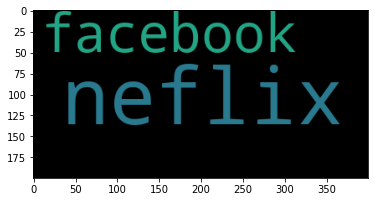

In [41]:
plt.imshow(wc)

In [46]:
a = pd.DataFrame(['dog dog dog', 'cat cat cat', 'dog cat', 'dog dog', 'cat fish', 'penguin fish'], columns=['s'])

In [52]:
Counter(' '.join(a['s']))

Counter({'d': 6,
         'o': 6,
         'g': 7,
         ' ': 13,
         'c': 5,
         'a': 5,
         't': 5,
         'f': 2,
         'i': 3,
         's': 2,
         'h': 2,
         'p': 1,
         'e': 1,
         'n': 2,
         'u': 1})

In [56]:
' '.join(a['s']).split()

['dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'cat',
 'fish',
 'penguin',
 'fish']

In [55]:
Counter('dog dog dog cat cat cat dog cat dog dog cat fish penguin fish')

Counter({'d': 6,
         'o': 6,
         'g': 7,
         ',': 2,
         ' ': 13,
         'c': 5,
         'a': 5,
         't': 5,
         'f': 2,
         'i': 3,
         's': 2,
         'h': 2,
         'p': 1,
         'e': 1,
         'n': 2,
         'u': 1})